In [44]:
import numpy as np
import h5py
from types import SimpleNamespace
import matplotlib.pyplot as plt

with h5py.File("data/data.hdf5") as F:
    T = np.array(F["/T"])
    gridSizes = np.array(F["/gridSizes"])

    # Observables includes information for every grid size.
    Metropolis = SimpleNamespace(
        E=np.array(F["/Metropolis/E"]),
        M=np.array(F["/Metropolis/M"]),
        C=np.array(F["/Metropolis/C"]),
        X=np.array(F["/Metropolis/X"]),
    )

    Wolff = SimpleNamespace(
        E=np.array(F["/Wolff/E"]),
        M=np.array(F["/Wolff/M"]),
        C=np.array(F["/Wolff/C"]),
        X=np.array(F["/Wolff/X"]),
    )


## Derivation of the new Angle after Wolff flip

In [45]:
import sympy as sp

theta1, phi = sp.symbols("theta_1 phi")

# current spin angle
sx = sp.Matrix([sp.cos(theta1), sp.sin(theta1)])
# random reflection angle
r = sp.Matrix([sp.cos(phi), sp.sin(phi)])

# Wolff Formula
p = sx - 2 * (sx.dot(r))*r
p = sp.Matrix([p[0].simplify(), p[1].simplify()])

# Sign flipped = 180° phase shift
p

Matrix([
[-cos(2*phi - theta_1)],
[-sin(2*phi - theta_1)]])

# Metropolis

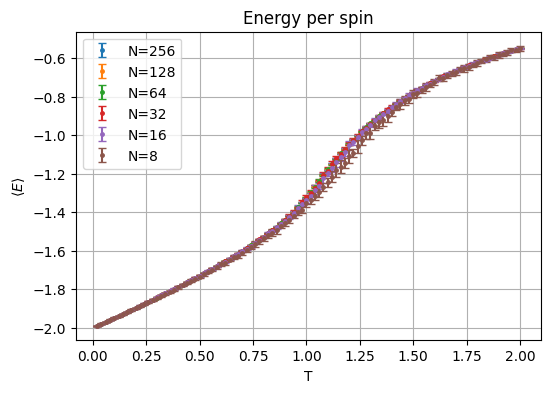

In [46]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Energy per spin")

for i,e in enumerate(Metropolis.E):
    plt.errorbar(T, e.mean(axis=0), e.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\langle E \rangle$")
plt.grid()
plt.show()

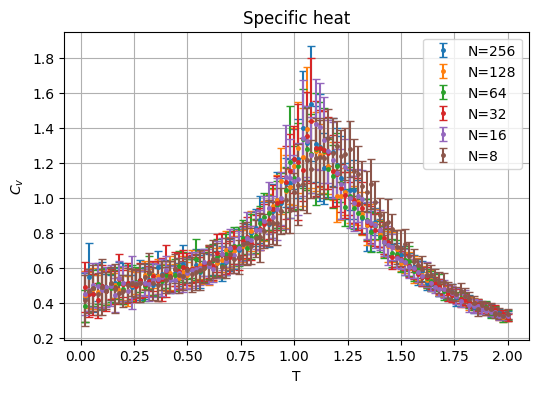

In [47]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Specific heat")

for i, c in enumerate(Metropolis.C):
    plt.errorbar(T, c.mean(axis=0), c.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

# plt.ylim([0, 10])
plt.legend()
plt.xlabel("T")
plt.ylabel(r"$C_v$")
plt.grid()
plt.show()

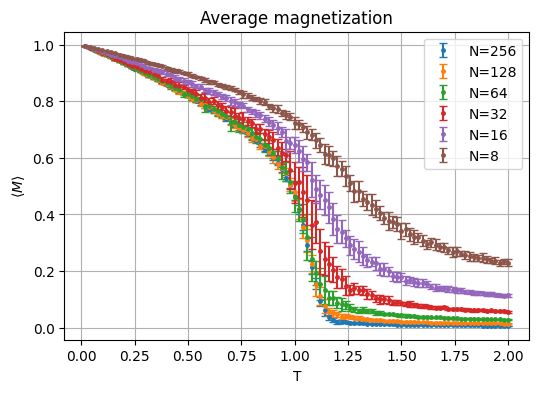

In [48]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Average magnetization")

for i, m in enumerate(Metropolis.M):
    plt.errorbar(T, m.mean(axis=0), m.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\langle M \rangle$")
plt.grid()
plt.show()

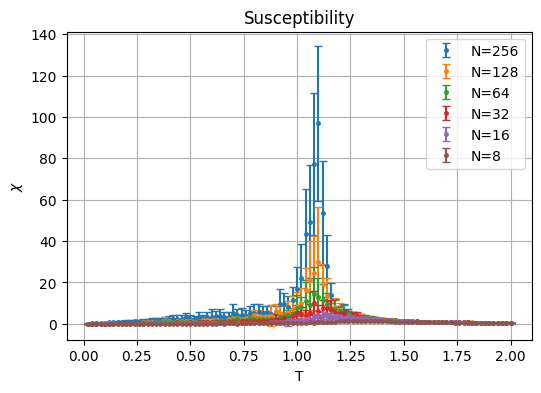

In [49]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Susceptibility")

for i, x in enumerate(Metropolis.X):
    plt.errorbar(T, x.mean(axis=0), x.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\chi$")
plt.grid()
plt.show()

# Wolff

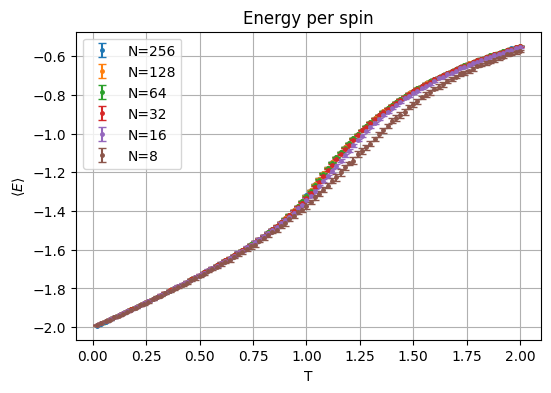

In [50]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Energy per spin")

for i,e in enumerate(Wolff.E):
    plt.errorbar(T, e.mean(axis=0), e.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\langle E \rangle$")
plt.grid()
plt.show()

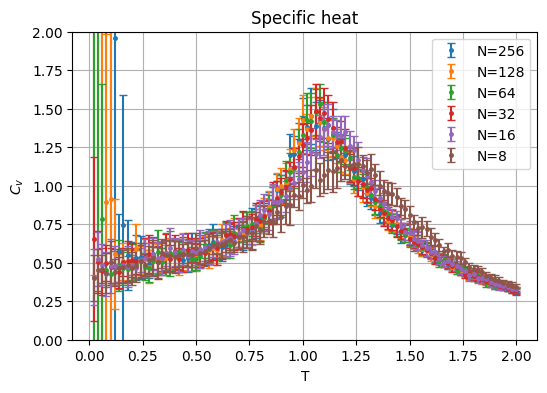

In [55]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Specific heat")

for i, c in enumerate(Wolff.C):
    plt.errorbar(T, c.mean(axis=0), c.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.ylim([0, 2])
plt.legend()
plt.xlabel("T")
plt.ylabel(r"$C_v$")
plt.grid()
plt.show()

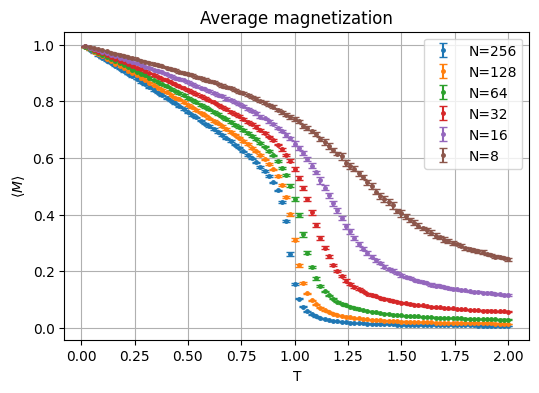

In [52]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Average magnetization")

for i, m in enumerate(Wolff.M):
    plt.errorbar(T, m.mean(axis=0), m.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\langle M \rangle$")
plt.grid()
plt.show()

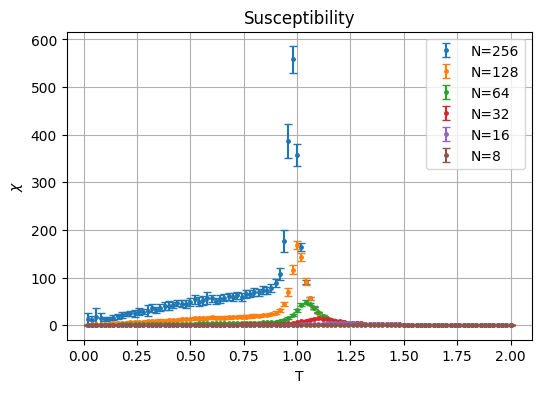

In [53]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("Susceptibility")

for i, x in enumerate(Wolff.X):
    plt.errorbar(T, x.mean(axis=0), x.std(axis=0), markersize=5, marker=".", linestyle='', capsize=3, label=f"N={gridSizes[i]}")

plt.legend()
plt.xlabel("T")
plt.ylabel(r"$\chi$")
plt.grid()
plt.show()

In [54]:

with h5py.File("data/autocorrelation.hdf5") as F:
    T = np.array(F["/T"])
    tau = np.array(F["Metropolis/C"])

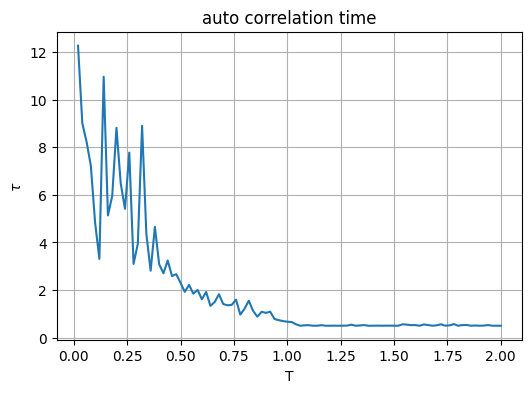

In [ ]:
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.title("auto correlation time")
plt.plot(T, tau)
plt.xlabel("T")
plt.ylabel(r"$\tau$")
plt.grid()
plt.show()